In [1]:
import scipy
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import os, sys
import math
import csv
from matplotlib_scalebar.scalebar import ScaleBar

In [23]:
masterFolder = os.fspath("D:\\Image Files\\LSBIO_Thermo_20250523")
subFolders = [os.path.join(masterFolder, subFolder) for subFolder in os.listdir(masterFolder) if "" in subFolder]
print(subFolders)

['D:\\Image Files\\LSBIO_Thermo_20250523\\Myf5Ai9LSBio', 'D:\\Image Files\\LSBIO_Thermo_20250523\\Myf5Ai9Thermo', 'D:\\Image Files\\LSBIO_Thermo_20250523\\Myf5GER24LSBio', 'D:\\Image Files\\LSBIO_Thermo_20250523\\Myf5GER24Thermo']


In [24]:
currentFolder = subFolders[0]
keyName = ""
filePathList = [os.path.join(currentFolder, fileName) for fileName in os.listdir(currentFolder)] #if keyName not in fileName.lower()]
# print(filePathList)
fileList = [fileName[:-4] for fileName in os.listdir(currentFolder) if keyName in fileName.lower()]
print(fileList)

['Myf5Ai9LSBio - Adrenal 1-100', 'Myf5Ai9LSBio - Adrenal 1-200', 'Myf5Ai9LSBio - Adrenal 1-400', 'Myf5Ai9LSBio - Adrenal 1-50', 'Myf5Ai9LSBio - Adrenal WT', 'Myf5Ai9LSBio - Kidney 1-100', 'Myf5Ai9LSBio - Kidney 1-200', 'Myf5Ai9LSBio - Kidney 1-400', 'Myf5Ai9LSBio - Kidney 1-50', 'Myf5Ai9LSBio - Kidney WT', 'Myf5Ai9LSBio - Liver 1-100', 'Myf5Ai9LSBio - Liver 1-200', 'Myf5Ai9LSBio - Liver 1-400', 'Myf5Ai9LSBio - Liver 1-50', 'Myf5Ai9LSBio - Liver WT', 'Myf5Ai9LSBio - Pancreas 1-100', 'Myf5Ai9LSBio - Pancreas 1-200', 'Myf5Ai9LSBio - Pancreas 1-400', 'Myf5Ai9LSBio - Pancreas 1-50', 'Myf5Ai9LSBio - Pancreas WT', 'Myf5Ai9LSBio - Spleen 1-100', 'Myf5Ai9LSBio - Spleen 1-200', 'Myf5Ai9LSBio - Spleen 1-400', 'Myf5Ai9LSBio - Spleen 1-50', 'Myf5Ai9LSBio - Spleen WT']


In [25]:
currentNum = 1
currentFilePath = filePathList[currentNum]
currentFile = fileList[currentNum]
print(currentFile)
img = ski.io.imread(currentFilePath)
print(img.shape)
print(img.dtype)

Myf5Ai9LSBio - Adrenal 1-200
(2048, 2048, 3)
uint16


In [11]:
imgDAPI = img[:,:,0]
imgTXR = img[:,:,1]#Cy3
imgCy5 = img[:,:,2]
# imgDAPI = img[:,:,3]

In [ ]:
if(img.shape[2] == 3):
    imgDAPI = img[:,:,2]
    imgRFP = img[:,:,0]
else:
    imgDAPI = img[1,:,:]
    imgRFP = img[0,:,:]

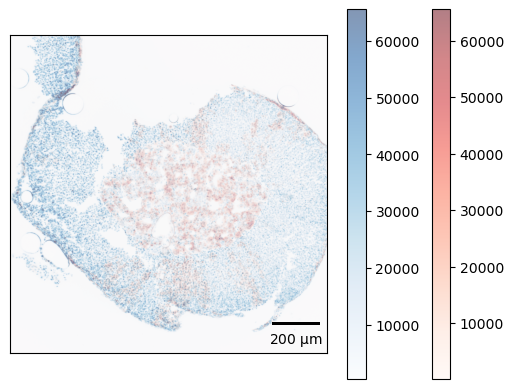

In [12]:
fig, ax = plt.subplots()
plt.imshow(imgTXR, cmap="Reds", alpha=0.5)
plt.colorbar()
plt.imshow(imgDAPI, cmap="Blues", alpha=0.5)
plt.colorbar()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])
scalebar = ScaleBar(0.65, "um", location='lower right', box_alpha=0)
ax.add_artist(scalebar)
filePathImage = os.path.join(currentFolder, currentFile+" - Image.png")
plt.savefig(filePathImage, dpi=300, bbox_inches='tight')
plt.show()

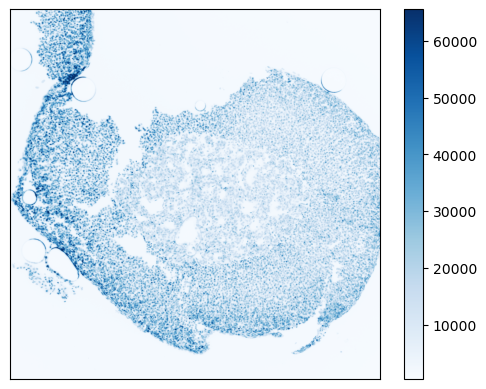

In [18]:
fig, ax = plt.subplots()
plt.imshow(imgDAPI, cmap="Blues")
plt.colorbar()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Max signal: 65536


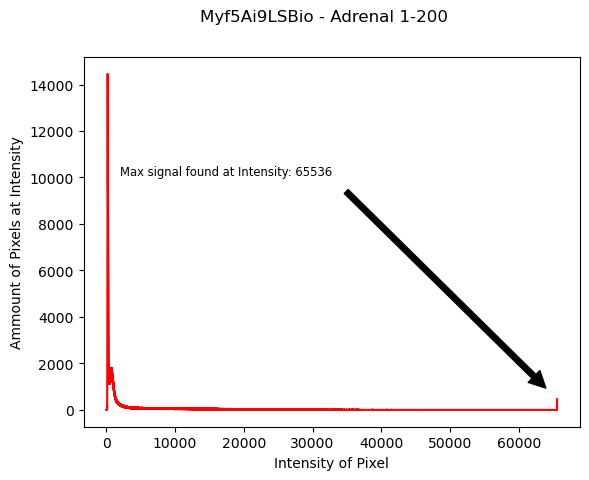

In [19]:
histogram, bin_edges = np.histogram(imgTXR, bins=65536, range=(0,65536))
trimmedHistogram = np.trim_zeros(histogram, 'b')
peaksRFP = scipy.signal.find_peaks(histogram[1:-1], width=100, distance=100)
plt.xlabel("Intensity of Pixel")
plt.ylabel("Ammount of Pixels at Intensity")
plt.suptitle(currentFile)
ax = plt.gca()
if(trimmedHistogram.size != 4096):
    labelMax = "Max signal found at Intensity: "+str(trimmedHistogram.size)
    ax.annotate(labelMax, xy=(trimmedHistogram.size, trimmedHistogram[-1]), xytext=(2000, np.amax(trimmedHistogram)*0.7), fontsize="small", arrowprops=dict(facecolor='black', shrink=0.05))
filePathHisto = os.path.join(currentFolder, currentFile+" - Histogram.png")
plt.plot(bin_edges[:len(trimmedHistogram)], trimmedHistogram, color="red")
plt.savefig(filePathHisto)
print("Max signal: "+str(trimmedHistogram.size))

In [27]:
for folder in subFolders:
    fileList = [fileName for fileName in os.listdir(folder) if "" in fileName.lower()]
    for file in fileList:
        fileSavePath = os.path.join("D:\\Image Files\\LSBIO_Thermo_20250523\\", file)
        filePath = os.path.join(folder, file)
        img = ski.io.imread(filePath)
        # if(img.shape[2] == 3):
        #     imgDAPI = img[:,:,2]
        #     imgRFP = img[:,:,0]
        # else:
        #     imgDAPI = img[1,:,:]
        #     imgRFP = img[0,:,:]
        imgCy5 = img[:,:,2]
        # imgRFP = img[:,:,1]#Cy3
        imgTXR = img[:,:,1]
        imgDAPI = img[:,:,0]
        
        # histogram, bin_edges = np.histogram(imgRFP, bins=65536, range=(0,65536))
        # trimmedHistogram = np.trim_zeros(histogram, 'b')
        # peaksRFP = scipy.signal.find_peaks(histogram[1:-1], width=100, distance=100)
        # plt.xlabel("Intensity of Pixel", labelpad=20)
        # plt.ylabel("Amount of Pixels at Intensity", labelpad=20)
        # plt.suptitle(file[:-4]+" - Histogram Cy3")
        # ax = plt.gca()
        # if(trimmedHistogram.size != 4096):
        #     labelMax = "Max signal found at Intensity: "+str(trimmedHistogram.size)
        #     ax.annotate(labelMax, xy=(trimmedHistogram.size, trimmedHistogram[-1]), xytext=(trimmedHistogram.size*0.5, np.amax(trimmedHistogram)*0.7), fontsize="small", arrowprops=dict(facecolor='black', shrink=0.05))
        # figureFileHisto = fileSavePath[:-4]+" - Histogram Cy3.png"
        # plt.plot(bin_edges[:len(trimmedHistogram)], trimmedHistogram, color="red")
        # plt.savefig(figureFileHisto, bbox_inches='tight')
        # plt.close()

        histogram, bin_edges = np.histogram(imgCy5, bins=65536, range=(0,65536))
        trimmedHistogram = np.trim_zeros(histogram, 'b')
        peaksRFP = scipy.signal.find_peaks(histogram[1:-1], width=100, distance=100)
        plt.xlabel("Intensity of Pixel", labelpad=20)
        plt.ylabel("Amount of Pixels at Intensity", labelpad=20)
        plt.suptitle(file[:-4]+" - Histogram Cy5")
        ax = plt.gca()
        if(trimmedHistogram.size != 4096):
            labelMax = "Max signal found at Intensity: "+str(trimmedHistogram.size)
            ax.annotate(labelMax, xy=(trimmedHistogram.size, trimmedHistogram[-1]), xytext=(trimmedHistogram.size*0.5, np.amax(trimmedHistogram)*0.7), fontsize="small", arrowprops=dict(facecolor='black', shrink=0.05))
        figureFileHisto = fileSavePath[:-4]+" - Histogram Cy5.png"
        plt.plot(bin_edges[:len(trimmedHistogram)], trimmedHistogram, color="red")
        plt.savefig(figureFileHisto, bbox_inches='tight')
        plt.close()

        histogram, bin_edges = np.histogram(imgTXR, bins=65536, range=(0,65536))
        trimmedHistogram = np.trim_zeros(histogram, 'b')
        peaksRFP = scipy.signal.find_peaks(histogram[1:-1], width=100, distance=100)
        plt.xlabel("Intensity of Pixel", labelpad=20)
        plt.ylabel("Amount of Pixels at Intensity", labelpad=20)
        plt.suptitle(file[:-4]+" - Histogram TXR")
        ax = plt.gca()
        if(trimmedHistogram.size != 4096):
            labelMax = "Max signal found at Intensity: "+str(trimmedHistogram.size)
            ax.annotate(labelMax, xy=(trimmedHistogram.size, trimmedHistogram[-1]), xytext=(trimmedHistogram.size*0.5, np.amax(trimmedHistogram)*0.7), fontsize="small", arrowprops=dict(facecolor='black', shrink=0.05))
        figureFileHisto = fileSavePath[:-4]+" - Histogram TXR.png"
        plt.plot(bin_edges[:len(trimmedHistogram)], trimmedHistogram, color="red")
        plt.savefig(figureFileHisto, bbox_inches='tight')
        plt.close()
        
        # figureFileImage = fileSavePath[:-4]+" - Image Cy3.png"
        # fig, ax = plt.subplots()
        # plt.imshow(imgRFP, cmap="Reds", alpha=0.5)
        # plt.suptitle(file[:-4]+" - Cy3 Signal")
        # ax.set_yticklabels([])
        # ax.set_xticklabels([])
        # ax.set_xticks([])
        # ax.set_yticks([])
        # plt.colorbar()
        # scalebar = ScaleBar(0.65, "um", location='lower right', box_alpha=0)
        # ax.add_artist(scalebar)
        # plt.savefig(figureFileImage, dpi=300, bbox_inches='tight')
        # plt.close()

        figureFileImage = fileSavePath[:-4]+" - Image Cy5.png"
        fig, ax = plt.subplots()
        plt.imshow(imgCy5, cmap="Purples", alpha=0.5)
        plt.suptitle(file[:-4]+" - Cy5 Signal")
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        plt.colorbar()
        scalebar = ScaleBar(0.65, "um", location='lower right', box_alpha=0)
        ax.add_artist(scalebar)
        plt.savefig(figureFileImage, dpi=300, bbox_inches='tight')
        plt.close()

        figureFileImage = fileSavePath[:-4]+" - Image TXR.png"
        fig, ax = plt.subplots()
        plt.imshow(imgTXR, cmap="Reds", alpha=0.5)
        plt.suptitle(file[:-4]+" - TXR Signal")
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        plt.colorbar()
        scalebar = ScaleBar(0.65, "um", location='lower right', box_alpha=0)
        ax.add_artist(scalebar)
        plt.savefig(figureFileImage, dpi=300, bbox_inches='tight')
        plt.close()
        
        figureFileImage = fileSavePath[:-4]+" - Image DAPI.png"
        fig, ax = plt.subplots()
        plt.imshow(imgDAPI, cmap="Blues", alpha=0.5)
        plt.suptitle(file[:-4]+" - DAPI Signal")
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        plt.colorbar()
        scalebar = ScaleBar(0.65, "um", location='lower right', box_alpha=0)
        ax.add_artist(scalebar)
        plt.savefig(figureFileImage, dpi=300, bbox_inches='tight')
        plt.close()
        print(file+" Max RFP Signal: "+str(trimmedHistogram.size))
        # break;

Myf5Ai9LSBio - Adrenal 1-100.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Adrenal 1-200.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Adrenal 1-400.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Adrenal 1-50.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Adrenal WT.tif Max RFP Signal: 8895
Myf5Ai9LSBio - Kidney 1-100.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Kidney 1-200.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Kidney 1-400.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Kidney 1-50.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Kidney WT.tif Max RFP Signal: 3050
Myf5Ai9LSBio - Liver 1-100.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Liver 1-200.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Liver 1-400.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Liver 1-50.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Liver WT.tif Max RFP Signal: 3768
Myf5Ai9LSBio - Pancreas 1-100.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Pancreas 1-200.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Pancreas 1-400.tif Max RFP Signal: 65536
Myf5Ai9LSBio - Pancreas 1-50.tif Max 

In [33]:
for folder in subFolders:
    fileList = [fileName for fileName in os.listdir(folder) if "ger" in fileName.lower()]
    for file in fileList:
        filePath = os.path.join(folder, file)
        img = ski.io.imread(filePath)
        imgDAPI = img[:,:,1]
        imgRFP = img[:,:,0]
        plt.imshow(imgRFP, cmap="seismic")
        plt.suptitle(file[:-4])
        figureFile = file[:-4]+" - DMi8 Image - seismic.tif"
        plt.savefig(figureFile, dpi=1200)
        plt.close()